# Midterm Exam (48 pts)

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

---
**1.** (6 pts) Write a function that returns the sum of squared differences between two NumPy arrays (assume they are of the same shape). Use NumPy, do NOT use for loops or list comprehensions.

In [ ]:
def sse(array1, array2):
    return ((array1 - array2)**2).sum()

---
**2.** (6 pts) Write a while loop that prints a new random number between 0 and 1 each time, and stops after printing a value greater than 0.8.

In [ ]:
while True:
    rv = np.random.rand(1)
    print(rv)
    if rv > 0.8:
        break

---
**3.** (6 pts) For the 2-D `xyz` array below, each row refers to a $(x,y,z)$ coordinate. Compute the average $(x,y,z)$ position for all five points. **Do this in a single operation using NumPy.**

In [42]:
# Each row of the matrix xyz is a (x,y,z) coordinate.
xyz = np.array(
    [[9, 7, 2],
     [8, 3, 5],
     [5, 7, 7],
     [8, 0, 1],
     [3, 2, 3]
    ], dtype=float)

In [43]:
xyz.mean(axis=0)

array([6.6, 3.8, 3.6])

---
**4.** (6 pts) Mice are trained to press a lever to recieve a reward. On average, subjects lever press 5 times per minute. Use a bar plot to show the expected probability distribution of 0-20 lever presses in a minute. *Hint: Is the expected distribution continuous or discrete? Which of the distributions we discussed in lecture is most likely to apply?*

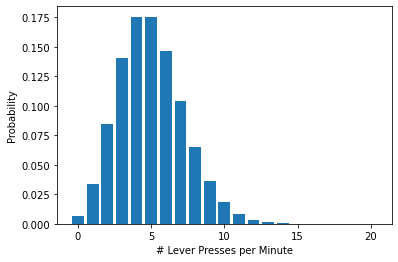

In [37]:
numLeverPresses = np.arange(21)
leverPressesPerMinuteDist = st.poisson(5)

plt.bar(numLeverPresses, leverPressesPerMinuteDist.pmf(numLeverPresses))
plt.xlabel('# Lever Presses per Minute')
plt.ylabel('Probability');

---
**5.** See a-d below which refer to the following data. You record the time-dependent current amplitude through a single ion channel both in the absence (`control_pA`) and presence of a toxin (`toxin_pA`). See data below which only includes time points where the channel was open - i.e. data where the channel was closed have been removed. Assume current fluctuations are uncorrelated.

In [9]:
# Open channel currents (pA) in control conditions.
control_pA = np.array([4.03150921, 5.35005992, 4.9044136 , 5.75425045, 4.54202161,
       4.35710467, 5.97752543, 5.05624353, 3.22346375, 7.11071582,
       4.04086427, 4.32857646, 6.30056182, 3.65809927, 6.57265728,
       4.70164081, 5.1101728 , 5.71270398, 5.00034292, 4.19906666,
       2.03006266, 4.10125049, 5.57952774, 5.50038489, 5.97479919,
       5.42698878, 5.88464693, 3.53925318, 4.86306604, 4.54504284,
       4.06832375, 3.38257841, 5.72606498, 5.77082579, 3.94417216,
       6.04297478, 6.03137911, 4.72622255, 4.31080346, 5.06943403,
       4.13237601, 5.37546877, 5.48315923, 2.60443664, 4.58468215,
       4.9446293 , 6.01987885, 5.15408473, 4.81054766, 5.33714209,
       6.64552171, 7.0578201 , 5.36019945, 4.72538113, 6.30884626,
       5.51767348, 3.35226856, 3.82817138, 6.97998826, 4.39735622,
       7.54209114, 6.19864503, 4.97246172, 5.34602361, 5.82432497,
       4.0865825 , 5.47517538, 5.40070897, 2.8524926 , 3.83639657,
       4.93458818, 4.88141644, 6.01449063, 6.25857314, 4.03744697,
       4.60863723, 5.35649482, 5.39405226, 6.22138368, 6.01617168,
       4.19447619, 4.88831804, 4.88241037, 5.9060959 , 5.21696952,
       5.86979465, 4.77714168, 3.53762488, 4.36346394, 4.40397988,
       5.25795862, 4.31317957, 3.70375756, 3.8538846 , 5.47317128,
       4.73139441, 4.37810953, 4.41140894, 5.18347364, 4.53585324,
       4.11916743, 3.04444944, 4.76087713, 5.22170241, 5.79857067,
       5.35625202, 6.43433742, 3.43649271, 4.61494332, 5.57264178,
       3.930557  , 4.56218124, 4.61044655, 5.1246218 , 5.93238325,
       4.72979243, 4.96153242, 5.32342659, 4.5894581 , 5.18472725,
       4.01706299, 4.61919031, 5.94454731, 3.61618331, 5.69556144,
       5.13398501, 4.17378522, 4.39720973, 5.15826113, 6.05233913,
       4.17269185, 4.03900288, 4.45355939, 4.19994886, 4.12870401,
       5.83701024, 4.38492446, 3.92021803, 4.40789588, 5.84415893,
       5.05424301, 6.32789738, 3.47154195, 4.96423708, 5.83862982,
       6.42686264, 4.75656097, 5.54022733, 3.53297469, 4.76121663,
       5.01499506, 5.3697581 , 5.9614272 , 6.25372446, 5.75877715,
       4.95992757, 3.94369449, 5.35967673, 3.41762373, 4.64050732,
       5.99511177, 5.27236238, 5.59935983, 2.62828184, 4.2925427 ,
       4.18171814, 5.06102011, 5.10920024, 6.80851243, 5.08496527,
       4.76387311, 4.16885758, 4.8072182 , 4.61179928, 5.62581193,
       4.61322343, 3.90061734, 5.65824602, 5.11203629, 5.98888234,
       4.46230765, 3.37139586, 4.82700425, 5.95728518, 4.73280883,
       4.11400828, 5.55439261, 6.1559831 , 4.74786815, 4.79568241,
       4.11720113, 4.72263365, 6.93646713, 4.27758138, 4.9576273 ,
       6.1331057 , 4.7093127 , 5.81270598, 5.71730717, 4.29894352,
       6.36630565, 4.68713094, 6.37881931, 3.17309655, 2.63717159])

# Open channel currents (pA) in the presence of a toxin.
toxin_pA = np.array([ 7.60961679,  9.37034271,  7.07246212,  5.86773613,  5.92226577,
        8.76583987,  7.32077966,  7.23182365,  8.40735501,  8.85710003,
        5.92910102,  8.20628013,  9.23666421,  8.68871746,  8.33005897,
        7.48336383,  7.80298365,  7.43452038,  7.46266961,  7.41682678,
        9.69396569,  9.09118965,  7.49661445,  8.98263113,  8.81012844,
        6.30884951,  8.21543216,  7.97151925,  8.74100316,  8.2157272 ,
        7.32937124,  7.56515421,  9.58882995,  7.82420469,  5.26593059,
        7.48153336,  8.3063745 ,  7.67310726, 10.01612404,  7.79477974,
        7.10440927,  5.92735657,  7.33097054,  7.86274952,  8.03131921,
       11.24918233,  8.44044296,  8.21363828,  6.70968127,  8.9176313 ,
       11.43552128,  8.70348016,  6.87658295,  8.67987668,  6.33068464,
        8.89119019,  7.26888331,  8.27544728,  8.15041154,  6.07242236,
        8.73241919,  5.98780195,  7.80820107,  7.79206312,  8.13674211,
        9.64763637,  8.72122585,  9.14177842,  7.94235773,  7.57852162,
        6.72718469,  7.55439714,  8.98093647,  7.82369591,  8.02313094,
        9.19062157,  7.8682468 ,  7.31675927,  9.94454295,  9.30453427,
        9.36754654,  9.75977773,  5.1849242 ,  8.74018526,  8.54621738,
        7.33227804,  7.38875862,  5.94554764,  7.06422596,  6.73617612,
        8.63929211,  7.97148873,  7.72168226,  7.84022914,  9.07691762,
        8.40690996,  8.7771139 ,  6.61492601,  6.10637652,  7.14955948,
        6.74877077,  8.57666357,  6.18863655,  8.56078376,  7.14224161,
        8.24987134,  9.49010618,  8.76482982,  9.17533594,  8.72207856,
        8.17676082,  8.39039663,  8.96798519,  7.77505548,  8.90350684,
        8.10008448,  8.46045961,  9.65848642,  8.25876851,  7.77492258,
        8.58311361,  6.70798608,  6.70562358,  6.93360349,  8.3013277 ,
        7.61311802,  8.56594907,  7.33282668, 11.00033713,  7.85895211,
        7.44621012,  8.57509475,  7.05178452,  8.37078844, 10.62156803,
        6.99158165,  7.81354149,  8.06160781,  7.90673138,  9.90885401,
        6.81565899,  8.67192309,  7.9539827 ,  8.25855893,  8.27149754,
        7.17481818,  8.54761346,  7.83062659,  9.24647097,  6.6307797 ,
        7.32669798,  8.28532766,  7.08691382,  6.38533146,  9.0104272 ,
        8.52544934,  7.61334789,  6.77356794,  8.39287474,  6.86095398,
        8.60455185,  9.35001121,  9.38519484,  6.9673516 ,  7.41680611,
        7.0467405 ,  8.57751505,  9.69495461,  9.74565552,  8.33842592,
        9.12333636,  7.4968431 ,  8.43236925,  8.33333632,  8.22731799,
        9.05307618,  8.26975749,  7.56401947,  7.12560856,  6.46681031,
        8.71997107,  6.63361736,  8.28835295,  6.584427  ,  6.2973554 ,
        8.53158821,  7.45407834,  8.50039049,  8.4475556 ,  8.28053785,
        6.88277102,  7.41688387,  9.93133193,  5.9638023 ,  6.68364453])

**5a.** (6 pts) Plot a histogram of the measured open channel currents in both control and toxin conditions (overlaid on a single plot). Use 20 bins for each histogram and make them semitransparent so any overlap is visible. Label the x-axis and include the proper units. Label the y-axis as 'Counts'. Include a legend for the conditions.

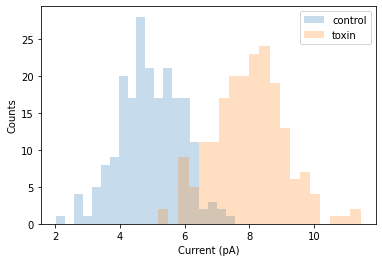

In [11]:
plt.hist(control_pA, bins=20, alpha=0.25, label='control')
plt.hist(toxin_pA, bins=20, alpha=0.25, label='toxin')
plt.xlabel('Current (pA)')
plt.ylabel('Counts')
plt.legend();

**5b.** (6 pts) Based on your visual inspection of the plot in 5a, do you think the toxin has an effect on mean current amplitude? Also, do you think the toxin has an effect on the current fluctuations around the mean (i.e. variance or standard deviation)?

**5c.** (6 pts) Test the null hypothesis that the toxin has no effect on mean current amplitude using a permutation test with 10,000 permutations. Compute the difference in mean current for each permutation. Report the 95% confidence interval for the distribution of permuted mean current differences under the null hypothesis. *You don't need to plot anything here. That will be done in 5d below.*

In [21]:
na = len(control_pA)
nb = len(toxin_pA)
allcurrents = np.zeros((na+nb,))
allcurrents[:na] = control_pA
allcurrents[-nb:] = toxin_pA
permstats = np.zeros((10000))  # <-- will store difference for each permutation
for i in range(10000):
    np.random.shuffle(allcurrents)
    perma = allcurrents[:na]
    permb = allcurrents[-nb:]
    permstats[i] = permb.mean() - perma.mean()  # <-- difference for ith permutation

lb, ub = np.quantile(permstats, [0.025, 0.975])

print(f"""
Assuming the toxin has no effect on mean current, 
we should measure differences in mean current between control and toxin samples 
that fall between {lb:.2f} and {ub:.2f} pA with 95% confidence.
""")


Assuming the toxin has no effect on mean current, 
we should measure differences in mean current between control and toxin samples 
that fall between -0.37 and 0.37 pA with 95% confidence.



**5d.** (6 pts) Plot a histogram of the permuted differences in mean current amplitude with 100 bins. Plot dashed vertical lines for the 95% confidence interval of your permuted distribution. Also plot a solid vertical line for the measured difference in mean current (from the `control_pA` and `toxin_pA` data given above). Based on this plot, do you reject the null hypothesis that the toxin has no efect on mean current amplitude?

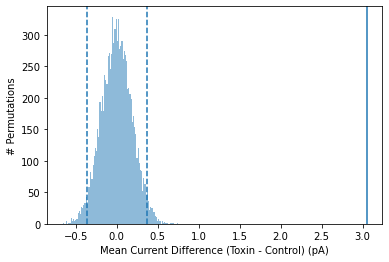

In [22]:
plt.hist(permstats, bins=100, alpha=0.5)
plt.xlabel('Mean Current Difference (Toxin - Control) (pA)')
plt.ylabel('# Permutations');

lb, ub = np.quantile(permstats, [0.025, 0.975])
plt.axvline(lb, linestyle='--')
plt.axvline(ub, linestyle='--');

plt.axvline(toxin_pA.mean() - control_pA.mean());